In [1]:
# We start by importing Image (from PIL package)
import Image
import numpy as np
import pandas as pd
import sys, os, re, requests, StringIO
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
image_dir = 'data/images/'
thumbnail_dir = 'data/images_compressed/'
target_dim = 100

Script that splits all the directories into subdirectories (so that OS isn't overwhelmed).

In [9]:
cur_dirs = os.listdir(image_dir)
for listing in cur_dirs:
    if(len(listing) >= 7):
        if not os.path.exists(image_dir + listing[:4]):
            os.mkdir(image_dir + listing[:4])
        os.rename(image_dir + listing, image_dir + listing[:4] + '/' + listing)

In [ ]:
df = pd.DataFrame([], columns = ['listing_id', 'photo_name', 'width', 'height', 'format', 'mode', 'bits', 'layers'])
if not os.path.exists(thumbnail_dir):
    os.mkdir(thumbnail_dir)
for superlisting in os.listdir(image_dir):
    try:
        if not os.path.exists(thumbnail_dir + superlisting):
            os.mkdir(thumbnail_dir + superlisting)
        for listing in os.listdir(image_dir + superlisting + '/'):
            lpath = superlisting + '/' + listing
            try:
                if not os.path.exists(thumbnail_dir + lpath):
                    os.mkdir(thumbnail_dir + lpath)
                for image in os.listdir(image_dir + lpath + '/'):
                    try:
                        im = Image.open(image_dir + lpath + '/' + image)
                        df = df.append({'listing_id': int(listing), 'photo_name': image,
                                        'width': im.width, 'height': im.height,
                                        'format': im.format, 'mode': im.mode, 'bits': im.bits, 'layers': im.layers},
                                       ignore_index = True)
                        im.resize((target_dim, target_dim), resample = Image.LANCZOS)\
                          .save(thumbnail_dir + lpath + '/' + image)
                    except Exception as e:
                        sys.stderr.write('Unable to handle ' + image_dir + lpath + '/' + image + '\n')
                        sys.stderr.write(str(e) + '\n')
            except Exception as e:
                sys.stderr.write('Unable to open ' + image_dir + lpath + '\n')
                sys.stderr.write(str(e) + '\n')
    except Exception as e:
        sys.stderr.write('Unable to open ' + image_dir + superlisting + '\n')
        sys.stderr.write(str(e) +'\n')
df.to_csv('data/images.csv', index = False)

Unable to handle data/images/6812/6812934/6812934_f8c923cb3319ff54ed5c3651d904bbca.jpg
image file is truncated (84 bytes not processed)
Unable to handle data/images/6815/6815400/6815400_02bf0ac5dcdefd4bbb4c36007e19e1fb.jpg
image file is truncated (90 bytes not processed)
Unable to handle data/images/6816/6816878/6816878_60f6cb535870f0f5a2047f88b6e94d4c.jpg
image file is truncated (53 bytes not processed)
Unable to handle data/images/6818/6818084/6818084_c3f818d46c04eb14995fd8531af93922.jpg
image file is truncated (33 bytes not processed)
Unable to handle data/images/7228/7228600/7228600_a24c04cf49b80adcedc69979d58f8620.jpg
image file is truncated (181 bytes not processed)
Unable to handle data/images/7229/7229639/7229639_85c47df537a1f3199695905b9c43153d.jpg
image file is truncated (45 bytes not processed)
Unable to handle data/images/7233/7233385/7233385_6f006a378f06402fa8f6f7a03ce7d0a0.jpg
image file is truncated (36 bytes not processed)
Unable to handle data/images/6820/6820556/68205

In [16]:
## some weird stuff on the directories. Let's get rid of it.
for superlisting in os.listdir(image_dir):
    try:
        for listing in os.listdir(image_dir + superlisting + '/'):
            lpath = superlisting + '/' + listing
            try:
                images = os.listdir(image_dir + lpath + '/')
                if '.DS_Store' in images:
                    os.remove(image_dir + lpath + '/' + '.DS_Store')
                    if listing in images:
                        empty = True
                        for subimage in os.listdir(image_dir + lpath + '/' + listing + '/'):
                            if subimage in images:
                                os.remove(image_dir + lpath + '/' + listing + '/' + subimage)
                            else:
                                empty = False
                        if empty:
                            os.rmdir(image_dir + lpath + '/' + listing)
                        else:
                            sys.stderr.write('Unable to remove ' + image_dir + lpath + '/' + listing + '\n')
            except Exception as e:
                sys.stderr.write('Unable to open ' + image_dir + lpath + '\n')
                sys.stderr.write(str(e) + '\n')
    except Exception as e:
        sys.stderr.write('Unable to open ' + image_dir + superlisting + '\n')
        sys.stderr.write(str(e) +'\n')

Unable to remove data/images/7113/7113061/7113061
Unable to remove data/images/7114/7114993/7114993


In [17]:
for col in ['format', 'mode', 'bits', 'layers']:
    df[col] = df[col].astype('category')

In [18]:
df.head(20)

,listing_id,photo_name,width,height,format,mode,bits,layers
0,6811957.0,6811957_33d08c8dc440c89bccc8d9889c5485a6.jpg,640.0,426.0,JPEG,RGB,8.0,3.0
1,6811957.0,6811957_3dad56e8bf3477b2900ca39d57df041e.jpg,640.0,426.0,JPEG,RGB,8.0,3.0
2,6811957.0,6811957_7d3ab8175d23fee64c0651b1bc16f2cc.jpg,426.0,640.0,JPEG,RGB,8.0,3.0
3,6811957.0,6811957_83a4e2e75ea15a5a1d2cc9de3407b1b9.jpg,640.0,426.0,JPEG,RGB,8.0,3.0
4,6811957.0,6811957_acbdbbe6ff435b9d4f520db6da1ada9a.jpg,640.0,426.0,JPEG,RGB,8.0,3.0
5,6811958.0,6811958_1fe0076c8b481e0af2223afab02503da.jpg,640.0,425.0,JPEG,RGB,8.0,3.0
6,6811958.0,6811958_23ceae42d2c88ffc5a057db1deb346c1.jpg,640.0,426.0,JPEG,RGB,8.0,3.0
7,6811958.0,6811958_bb863a4184a1e085f0c55e0172767abd.jpg,344.0,544.0,JPEG,RGB,8.0,3.0
8,6811958.0,6811958_c131c57b97afd739161579cdb41c9884.jpg,640.0,425.0,JPEG,RGB,8.0,3.0
9,6811960.0,6811960_3685d3542328b820980642535d8ccb72.jpg,448.0,336.0,JPEG,RGB,8.0,3.0


In [19]:
df.describe(include = 'all')

,listing_id,photo_name,width,height,format,mode,bits,layers
count,6.961370e+05,696137,696137.000000,696137.000000,696137,696137,696137.0,696137.0
unique,NaN,693732,NaN,NaN,1,2,1.0,2.0
top,NaN,6871524_d7a037feba4053595139543c018029ae.jpg,NaN,NaN,JPEG,RGB,8.0,3.0
freq,NaN,3,NaN,NaN,696137,695858,696137.0,695858.0
mean,7.025017e+06,NaN,556.223106,459.959975,NaN,NaN,NaN,NaN
std,1.267925e+05,NaN,116.507368,115.224694,NaN,NaN,NaN,NaN
min,6.811957e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,6.915888e+06,NaN,480.000000,402.000000,NaN,NaN,NaN,NaN
50%,7.022722e+06,NaN,640.000000,428.000000,NaN,NaN,NaN,NaN
75%,7.131321e+06,NaN,640.000000,481.000000,NaN,NaN,NaN,NaN


In [25]:
df[np.logical_and(df['mode'] != 'RGB',df['layers'] == 3)]

,listing_id,photo_name,width,height,format,mode,bits,layers


In [31]:
photos_list = []
photos_seen = 0
for path in ['data/train.json', 'data/test.json']:
    df_temp = pd.read_json(path)[['listing_id', 'photos']]
    for index, row in df_temp.iterrows():
        for url in row['photos']:
            photos_list.append([row['listing_id'], url])
            photos_seen += 1
            if photos_seen % 10000 == 0:
                sys.stdout.write('.')
                sys.stdout.flush()
    del df_temp
photos_list = pd.DataFrame(photos_list, columns = ['listing_id', 'photo_url'])

.....................................................................

In [32]:
photos_list['photo_name'] = photos_list['photo_url'].apply(lambda x: re.sub(r'^.*/', '', x))

In [33]:
photos_list.head(20)

,listing_id,photo_url,photo_name
0,7211212,https://photos.renthop.com/2/7211212_1ed4542ec...,7211212_1ed4542ec81621d70d1061aa833e669c.jpg
1,7211212,https://photos.renthop.com/2/7211212_7dfc41dce...,7211212_7dfc41dced69245065df83d08eed4a00.jpg
2,7211212,https://photos.renthop.com/2/7211212_c17853c4b...,7211212_c17853c4b869af6f53af08b0f5820b4c.jpg
3,7211212,https://photos.renthop.com/2/7211212_787ad8ea0...,7211212_787ad8ea0c089792e7453e2121f8ac89.jpg
4,7211212,https://photos.renthop.com/2/7211212_2e88b0d29...,7211212_2e88b0d293ee333c804c2f00536eee49.jpg
5,7150865,https://photos.renthop.com/2/7150865_be3306c5d...,7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg
6,7150865,https://photos.renthop.com/2/7150865_655f861a1...,7150865_655f861a1d5da70050010611016ae2ad.jpg
7,7150865,https://photos.renthop.com/2/7150865_5b8cc459f...,7150865_5b8cc459f3abd38bc81cbf329dab3220.jpg
8,7150865,https://photos.renthop.com/2/7150865_2f59c34ca...,7150865_2f59c34ca4ea98c26d559109a467ef84.jpg
9,7150865,https://photos.renthop.com/2/7150865_2258d2eb5...,7150865_2258d2eb5b5fb4bc0eb6534929cdee15.jpg


Look for photos that were corrupt and thus were not compressed

In [37]:
photos_list['local_compressed'] = photos_list.apply(lambda row: thumbnail_dir + str(row['listing_id'])[:4] + '/'\
                                                    + str(row['listing_id']) + '/' + row['photo_name'], axis = 1)

In [38]:
photos_list['missing'] = photos_list['local_compressed'].apply(lambda x: not os.path.exists(x))

In [43]:
photos_list['missing'].value_counts()

False    696047
True        265
Name: missing, dtype: int64

In [54]:
recovered = pd.DataFrame([], columns = ['listing_id', 'photo_name', 'width', 'height', 'format', 'mode', 'bits', 'layers'])
for index, row in photos_list[photos_list['missing']].iterrows():
    lpath = str(row['listing_id'])[:4] + '/' + str(row['listing_id'])
    try:
        im = Image.open(StringIO.StringIO(requests.get(row['photo_url']).content))
        recovered = recovered.append({'listing_id': row['listing_id'], 'photo_name': row['photo_name'],
                                      'width': im.width, 'height': im.height,
                                      'format': im.format, 'mode': im.mode, 'bits': im.bits, 'layers': im.layers},
                                     ignore_index = True)
        im.resize((target_dim, target_dim), resample = Image.LANCZOS)\
                      .save(thumbnail_dir + lpath + '/' + row['photo_name'])
        im.save(image_dir + lpath + '/' + row['photo_name'])
    except Exception as e:
        sys.stderr.write('Unable to handle ' + row['photo_url'] + '\n')
        sys.stderr.write(str(e) + '\n')

In [55]:
recovered

,listing_id,photo_name,width,height,format,mode,bits,layers
0,6890146.0,6890146_f943a88dcbad124c846c1c8f449dc2c1.jpg,640.0,428.0,JPEG,RGB,8.0,3.0
1,6878733.0,6878733_6e83e65ac922c17161fc00b15bc23ba2.jpg,480.0,640.0,JPEG,RGB,8.0,3.0
2,6824811.0,6824811_4d329f99e43a90cc52b829bf9729478a.jpg,640.0,425.0,JPEG,RGB,8.0,3.0
3,6823518.0,6823518_97c8ded0580a674d468a915ebad37ed5.jpg,640.0,426.0,JPEG,RGB,8.0,3.0
4,6887106.0,6887106_8d37cd1cae92ef85414197ef444e191a.jpg,600.0,400.0,JPEG,RGB,8.0,3.0
5,6929803.0,6929803_46e357cae6af5d81191f0cb78d06879b.jpg,303.0,376.0,JPEG,RGB,8.0,3.0
6,6836804.0,6836804_f1ed47d0526d1dfe9731b97ca6e72ffd.jpg,640.0,359.0,JPEG,RGB,8.0,3.0
7,6836804.0,6836804_60f5f773f921aa6a660d38b16313b928.jpg,360.0,640.0,JPEG,RGB,8.0,3.0
8,6889068.0,6889068_42f9051bee09e515fc863eb75a884c1f.jpg,640.0,480.0,JPEG,RGB,8.0,3.0
9,6901304.0,6901304_1f9d407819dbc67273834faad62c2315.jpg,400.0,300.0,JPEG,RGB,8.0,3.0


In [58]:
len(recovered.merge(df, how = 'inner', on = 'photo_name'))

90

In [73]:
df_all = pd.concat([df, recovered], ignore_index=True)

In [74]:
len(df_all)

696402

In [75]:
df_all = df_all.drop_duplicates()

In [76]:
len(df_all)

696312

In [79]:
df_all[df_all['photo_name'].duplicated(keep = False)].sort_values(by = 'photo_name')

,listing_id,photo_name,width,height,format,mode,bits,layers
1666,6813181.0,6813181_07340878e3c6e8dc618f91ce628d4088.jpg,640.0,296.0,JPEG,RGB,8.0,3.0
104359,7300858.0,6813181_07340878e3c6e8dc618f91ce628d4088.jpg,640.0,296.0,JPEG,RGB,8.0,3.0
1667,6813181.0,6813181_8ffff32941dace52da46d3eb1242d3c9.jpg,640.0,355.0,JPEG,RGB,8.0,3.0
104360,7300858.0,6813181_8ffff32941dace52da46d3eb1242d3c9.jpg,640.0,355.0,JPEG,RGB,8.0,3.0
104361,7300858.0,6813181_9e666cc8fe8c7907f152f282deedef8c.jpg,640.0,334.0,JPEG,RGB,8.0,3.0
1668,6813181.0,6813181_9e666cc8fe8c7907f152f282deedef8c.jpg,640.0,334.0,JPEG,RGB,8.0,3.0
104362,7300858.0,6813181_9f64f948556b572e0b00219cc78bbf98.jpg,563.0,640.0,JPEG,RGB,8.0,3.0
1669,6813181.0,6813181_9f64f948556b572e0b00219cc78bbf98.jpg,563.0,640.0,JPEG,RGB,8.0,3.0
3466,6814336.0,6814336_df5b9f6282769a625025954a7eadff8c.jpg,640.0,373.0,JPEG,RGB,8.0,3.0
32230,7248188.0,6814336_df5b9f6282769a625025954a7eadff8c.jpg,640.0,373.0,JPEG,RGB,8.0,3.0


In [87]:
for col in ['format', 'mode', 'bits', 'layers']:
    df_all[col] = df_all[col].astype('category')
for col in ['listing_id', 'width', 'height']:
    df_all[col] = df_all[col].astype('int')

In [83]:
df_all.describe(include = 'all')

,listing_id,photo_name,width,height,format,mode,bits,layers
count,6.963120e+05,696312,696312.000000,696312.000000,696312,696312,696312.0,696312.0
unique,NaN,693907,NaN,NaN,1,2,1.0,2.0
top,NaN,6914025_803c025ff1f150d7c01ace05f81f13f6.jpg,NaN,NaN,JPEG,RGB,8.0,3.0
freq,NaN,3,NaN,NaN,696312,696033,696312.0,696033.0
mean,7.025016e+06,NaN,556.227122,459.960789,NaN,NaN,NaN,NaN
std,1.267919e+05,NaN,116.504376,115.224075,NaN,NaN,NaN,NaN
min,6.811957e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,6.915889e+06,NaN,480.000000,402.000000,NaN,NaN,NaN,NaN
50%,7.022722e+06,NaN,640.000000,428.000000,NaN,NaN,NaN,NaN
75%,7.131322e+06,NaN,640.000000,481.000000,NaN,NaN,NaN,NaN


In [84]:
# after analyzing all fields, discard the redundant ones
df_all = df_all.drop(['format', 'mode', 'bits'], axis = 1)

In [88]:
df_all.to_csv('data/images.csv', index = False)

Now test if we can feed an open file to Image.

Idea is to perhaps extract the images directly from the 7zip file and output their metadata and thumbnails with a python script.

In [20]:
f = open('data/images_sample/6811960/6811960_a3bd517552d4163c4732c4bd5334b2e0.jpg', 'rb')

In [21]:
im = Image.open(f)

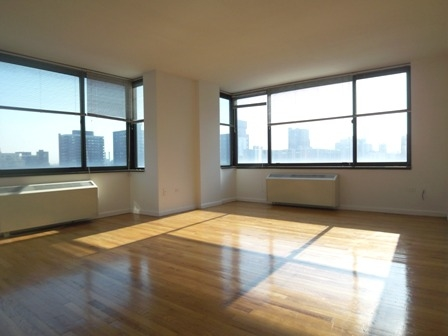

In [22]:
im

In determining the size of the thumbnails, we'd like to apply $5\times 5$ filters,
with $2\times 2$ maxpooling layers, over 3 layers.

if we have $n\times n$, it comes from maxpooling on $2n\times 2n$,
which in turn comes from $(2n+4)\times(2n+4)$.

Applied 3 times, we have $(8n+28)\times(8n+28)$.

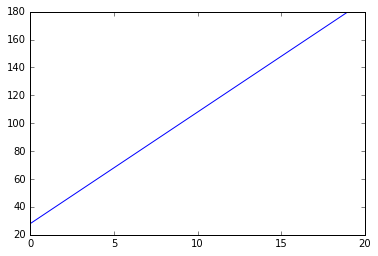

In [34]:
plt.plot(np.arange(20), 8*np.arange(20) + 28)

In [35]:
12*8+28

124

In [36]:
13*8+28

132

In [37]:
14*8+28

140

We can probably use $140\times 140$ thumbnails, or $148\times 148$.

Final number should depend on how much storage we need and have available.

In [40]:
im.resize((148,148)).save('thumbnail.jpg')

$148\times 148$ takes almost 5K. How many pictures do we have?

In [41]:
num_photos = 0
for path in ['data/train.json', 'data/test.json']:
    df = pd.read_json(path)
    num_photos += df['photos'].apply(len).sum()
num_photos

696312

In [43]:
del df

Let's assume we have 6GB max available storage for photos. We then get

In [44]:
6000000 / num_photos

8

Each thumbnail cannot exceed 8K. Then we can make thumbnails with side up to

In [48]:
n = np.sqrt(148*148 / 5 * 8)
n

187.18974330876145

In [49]:
np.floor((n-28)/8) * 8 + 28

180.0

However, for training, we only need to use the thumbnails from the training data, so...

In [50]:
df = pd.read_json('data/train.json')
num_photos = df['photos'].apply(len).sum()
del df

In [51]:
num_photos

276714

In [52]:
6000000/num_photos

21

In [53]:
n = np.sqrt(148*148 / 5 * 21)
n

303.28204694640266

In [54]:
np.floor((n-28)/8) * 8 + 28

300.0

In [3]:
im = Image.open('data/images_sample/6811960/6811960_a3bd517552d4163c4732c4bd5334b2e0.jpg')

In [7]:
values = np.array(im.getdata(0)).reshape(im.size)

In [8]:
values.shape

(448, 336)

In [9]:
im.size

(448, 336)

(array([  8.54430000e+04,   3.54310000e+04,   2.33800000e+03,
          4.61000000e+02,   2.09000000e+02,   8.60000000e+01,
          3.80000000e+01,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  0. ,   6.8,  13.6,  20.4,  27.2,  34. ,  40.8,  47.6,  54.4,
         61.2,  68. ]),
 <a list of 10 Patch objects>)

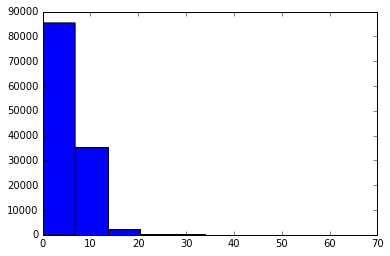

In [2]:
photos_count = list()
for path in ['data/train.json', 'data/test.json']:
    df = pd.read_json(path)
    photos_count.extend(list(df['photos'].apply(len)))
plt.hist(photos_count)

In [4]:
photos_count.sort(reverse = True)
photos_count[:40]

[68,
 60,
 50,
 50,
 50,
 46,
 46,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45]

In [12]:
sum([x-10 for x in photos_count if x > 10])

38051

In [13]:
len([x for x in photos_count if x == 0])

9238

In [18]:
df = pd.read_json('data/train.json')
df = df[df['photos'].apply(len) == 0]['interest_level']

In [22]:
df = pd.Categorical(df)

In [23]:
df.value_counts()

high        50
low       3442
medium     123
dtype: int64

In [24]:
del df

In [27]:
-sum([x * np.log(x) for x in [y/sum([50.0, 3442, 123]) for y in [50, 3442, 123]]])

0.22092821840208637

In [28]:
photos_count_dict = {}
for count in photos_count:
    photos_count_dict[count] = photos_count_dict.get(count, 0) + 1
photos_count_dict

{0: 9238,
 1: 2899,
 2: 3279,
 3: 11437,
 4: 19872,
 5: 21620,
 6: 17098,
 7: 12278,
 8: 10010,
 9: 4509,
 10: 3502,
 11: 2032,
 12: 2113,
 13: 987,
 14: 583,
 15: 489,
 16: 357,
 17: 289,
 18: 257,
 19: 146,
 20: 217,
 21: 64,
 22: 180,
 23: 50,
 24: 49,
 25: 56,
 26: 44,
 27: 18,
 28: 21,
 29: 15,
 30: 12,
 31: 3,
 32: 154,
 33: 4,
 34: 7,
 35: 8,
 36: 5,
 37: 46,
 38: 19,
 39: 1,
 41: 1,
 43: 1,
 44: 1,
 45: 33,
 46: 2,
 50: 3,
 60: 1,
 68: 1}

In [3]:
images_df = pd.read_csv('data/images.csv')

In [4]:
images_df.shape

(696312, 5)

In [7]:
import cv2, sys

In [16]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

def get_sharpness(imagePath):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return variance_of_laplacian(gray)

sharpness = - np.ones(images_df.shape[0], dtype = np.float)
counter = 0
for i, row in enumerate(images_df.iterrows()):
    listid = row[1]['listing_id']
    sharpness[i] = get_sharpness('data/images/%d/%d/%s' %(listid/1000, listid, row[1]['photo_name']))
    counter += 1
    if counter % 1000 == 0:
        if counter % 10000 == 0:
            sys.stdout.write(str(counter / 10000))
        else:
            sys.stdout.write('.')
        sys.stdout.flush()

.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25.........26.........27.........28.........29.........30.........31.........32.........33.........34.........35.........36.........37.........38.........39.........40.........41.........42.........43.........44.........45.........46.........47.........48.........49.........50.........51.........52.........53.........54.........55.........56.........57.........58.........59.........60.........61.........62.........63.........64.........65.........66.........67.........68.........69......

started at 1:40p

In [17]:
sharpness[-10:]

array([   34.92397775,   942.73014187,    89.08201493,  1078.65615252,
         103.31971096,   136.26105362,   641.95779822,    66.18016877,
         806.18937364,   423.27043262])

In [18]:
images_df['sharpness'] = sharpness

In [19]:
images_df.to_csv('data/images_sharpness.csv', index = False)

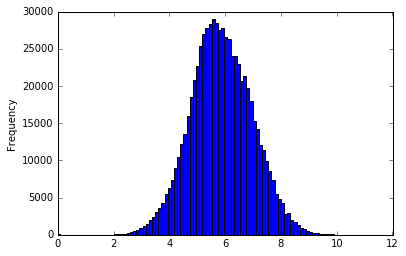

In [25]:
images_df['sharpness'].apply(lambda x: np.log(x+1)).plot.hist(bins = 100)

In [26]:
train = pd.read_json('data/train.json')

In [27]:
train = train[['listing_id', 'interest_level']]

In [28]:
images_train = images_df.merge(train, how = 'inner', on = 'listing_id')

In [31]:
images_train.head(10)

,listing_id,photo_name,width,height,layers,sharpness,interest_level
0,6811957,6811957_33d08c8dc440c89bccc8d9889c5485a6.jpg,640,426,3,85.559632,high
1,6811957,6811957_3dad56e8bf3477b2900ca39d57df041e.jpg,640,426,3,175.559010,high
2,6811957,6811957_7d3ab8175d23fee64c0651b1bc16f2cc.jpg,426,640,3,85.443224,high
3,6811957,6811957_83a4e2e75ea15a5a1d2cc9de3407b1b9.jpg,640,426,3,62.213131,high
4,6811957,6811957_acbdbbe6ff435b9d4f520db6da1ada9a.jpg,640,426,3,132.297190,high
5,6811965,6811965_667ecc99e679559ca6da6519574e7c74.jpg,600,370,3,224.943211,medium
6,6811965,6811965_b8f942e69c3ea9b8f28d059faef7f726.jpg,600,371,3,174.117964,medium
7,6811966,6811966_4b440093333057df6f5f7202db59e1f6.jpg,295,393,3,659.569352,high
8,6811966,6811966_8b83c24d1e43d49907fd4e5d35d9aa56.jpg,597,600,3,1363.702854,high
9,6811966,6811966_9e6365961d0688df4e2570c7656fe22a.jpg,295,393,3,124.529887,high


In [30]:
images_train_log_sharpness = images_train[['sharpness', 'interest_level']]
images_train_log_sharpness['sharpness'] = images_train_log_sharpness['sharpness'].apply(lambda x: np.log(x+1))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
images_train_log_sharpness.head(10)

,sharpness,interest_level
0,4.460834,high
1,5.173655,high
2,4.459488,high
3,4.146512,high
4,4.892581,high
5,5.420284,medium
6,5.165460,medium
7,6.493102,high
8,7.218692,high
9,4.832544,high


AttributeError: Unknown property columns

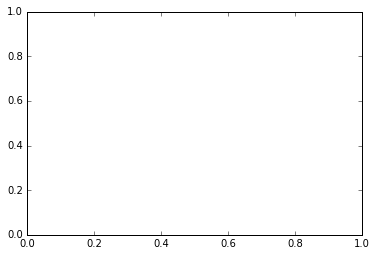

In [36]:
images_train_log_sharpness.plot.kde(columns = ['sharpness'], c = 'interest_level')

In [37]:
import seaborn as sns

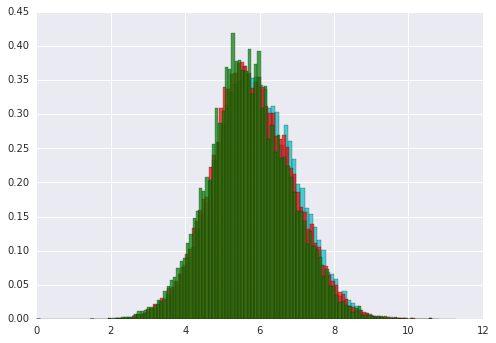

In [49]:
colors = ['c', 'r', 'g']
for i, level in enumerate(['low', 'medium', 'high']):
    plt.hist(images_train_log_sharpness.loc[images_train_log_sharpness['interest_level'] == level,'sharpness'], alpha = 0.7, bins = 100, color = colors[i], normed = True)

In [52]:
from ggplot import *

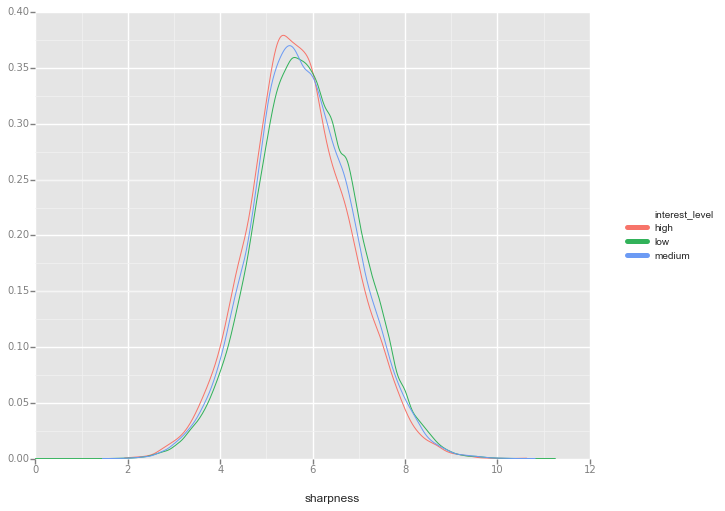

<ggplot: (8779914632485)>

In [53]:
ggplot(aes(x = 'sharpness', color = 'interest_level'), data = images_train_log_sharpness) + geom_density()

In [55]:
images_train_by_id = images_train[['listing_id', 'sharpness']]
images_train_by_id['log_sharpness'] = images_train_by_id['sharpness'].apply(lambda x: np.log(x+1))
images_train_by_id = images_train_by_id.groupby('listing_id').aggregate({'log_sharpness': np.mean})
images_train_by_id = images_train_by_id.reset_index().merge(train, how='inner', on = 'listing_id')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
images_train_by_id.head(10)

,listing_id,log_sharpness,interest_level
0,6811957,4.626614,high
1,6811965,5.292872,medium
2,6811966,6.084041,high
3,6811973,4.637043,medium
4,6811975,4.965978,medium
5,6812000,6.058274,low
6,6812004,5.614479,low
7,6812009,5.665337,low
8,6812033,5.949640,low
9,6812048,4.770850,low


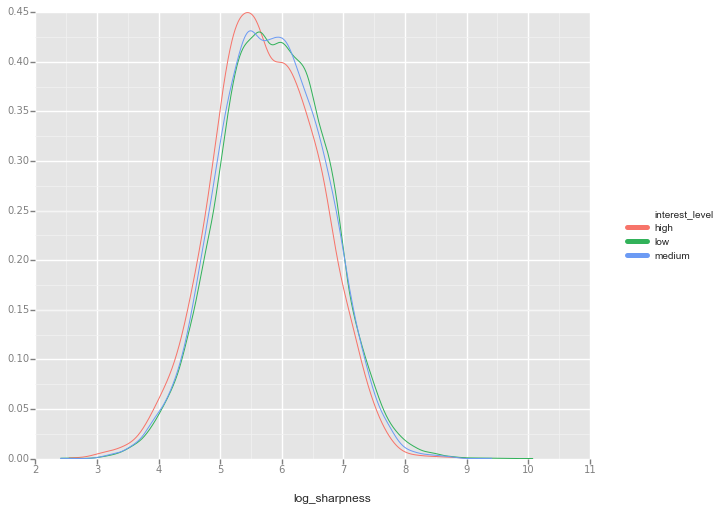

<ggplot: (8779919834213)>

In [58]:
ggplot(aes(x = 'log_sharpness', color = 'interest_level'), data = images_train_by_id) + geom_density()

Split `images_sharpness.csv` into train and test subsets.

In [2]:
images_sharpness = pd.read_csv('data/images_sharpness.csv')

In [3]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

In [4]:
images_train = images_sharpness.merge(train[['listing_id']], how = 'inner', on = 'listing_id')

In [5]:
images_test = images_sharpness.merge(test[['listing_id']], how = 'inner', on = 'listing_id')

In [6]:
print images_train.shape, images_test.shape

(276714, 6) (419598, 6)


In [7]:
images_sharpness.shape[0] - images_train.shape[0] - images_test.shape[0]

0

In [8]:
images_train.head(10)

,listing_id,photo_name,width,height,layers,sharpness
0,6811957,6811957_33d08c8dc440c89bccc8d9889c5485a6.jpg,640,426,3,85.559632
1,6811957,6811957_3dad56e8bf3477b2900ca39d57df041e.jpg,640,426,3,175.559010
2,6811957,6811957_7d3ab8175d23fee64c0651b1bc16f2cc.jpg,426,640,3,85.443224
3,6811957,6811957_83a4e2e75ea15a5a1d2cc9de3407b1b9.jpg,640,426,3,62.213131
4,6811957,6811957_acbdbbe6ff435b9d4f520db6da1ada9a.jpg,640,426,3,132.297190
5,6811965,6811965_667ecc99e679559ca6da6519574e7c74.jpg,600,370,3,224.943211
6,6811965,6811965_b8f942e69c3ea9b8f28d059faef7f726.jpg,600,371,3,174.117964
7,6811966,6811966_4b440093333057df6f5f7202db59e1f6.jpg,295,393,3,659.569352
8,6811966,6811966_8b83c24d1e43d49907fd4e5d35d9aa56.jpg,597,600,3,1363.702854
9,6811966,6811966_9e6365961d0688df4e2570c7656fe22a.jpg,295,393,3,124.529887


In [9]:
images_train.to_csv('data/images_train.csv', index = False)
images_test.to_csv('data/images_test.csv', index = False)